<img src = "./wow.png" style="width: 40px;"/> 
## DropRate WoW 

#### Quantas tentativas devo esperar para conseguir a montaria dos meus sonhos?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
c = [] #Lista de 1 a 100
for i in range(1,101):
    c.append(i)

In [3]:
def pelo_menos_1_sucesso(tentativas,fracasso):
    '''
    Dado o n° tentativas e a probabilidade de fracasso, retorna o valor da probabilidade de 
    pelo menos 1 sucesso em %.
    '''
    fracasso_total = fracasso**tentativas
    return (1-fracasso_total)*100

def qts_tentativas(fracasso,tentativas):
    '''
    Função recebe a probabilidade de fracasso e o numero de tentativas.
    Retorna lista com as probabilidades de se ter PELO MENOS 1 sucesso entre 1~quant. tentativas
    '''
    l=[]
    for i in range(tentativas):
        l.append(pelo_menos_1_sucesso(i,fracasso))
    return l

def tentativa_max(lista,n):
    '''
    Função que recebe lista de probabilidades e a n% minima.
    Retorna a tentativa mínima para que se tenha PELO MENOS 1 sucesso com n% de certeza
    '''
    for i in range(len(lista)):
        if lista[i]>n:
            return i
            break

def chance_sucesso(sucesso,jogadores):
    
    '''
    Função que recebe a prob(sucesso) de drop e a quantidade de jogadores simulados.
    Retorna uma lista com o numero de elementos equivalente ao da quant de jogadores,
    mostrando quantas tentativas foram necessárias para haver o primeiro sucesso. 
    Considera chance de sucesso padrão de 5%. Recebe a chance de sucesso em DECIMAL.
    '''
    l=[]
    tentativas = 1
    while tentativas < jogadores and len(l) < jogadores:
        if random.choice(c) <= (sucesso*100): # Se o numero escolhido randomicamente entre 100 for menor ou igual a chance de sucesso em %, resulta em sucesso!
            l.append(tentativas)
            tentativas = 1
        else:
            tentativas += 1
    return l

 - Geralmente as montarias mais legais possuem chance de drop 1~5%. Vamos analisar algumas coisas:

#### Simulacao 1: Montaria com 5% de droprate, amostragem de 1.000 jogadores

In [4]:
simulacao_1 = pd.Series(chance_sucesso(0.05,1000)) #5% drop, 1000 jogadores
simulacao_1.describe()

count    1000.00000
mean       20.03100
std        18.70481
min         1.00000
25%         7.00000
50%        15.00000
75%        27.00000
max       154.00000
dtype: float64

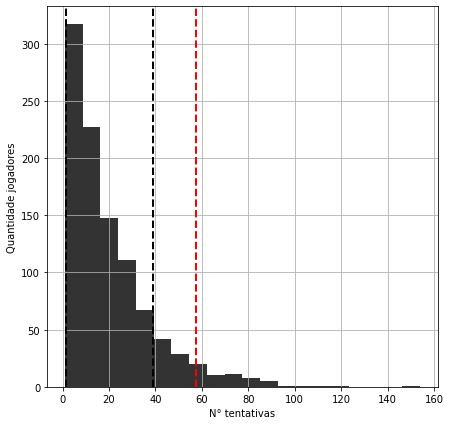

In [5]:
#A cada 1000 jogadores, quantos conseguirão o drop em quantas tentativas? 
simulacao_1.hist(color="k", alpha=0.8, bins=20, figsize=[7,7])
plt.axvline(simulacao_1.mean()-simulacao_1.std(), color='k', ls='--', lw=2) #Engloba 68% da população
plt.axvline(simulacao_1.mean()+simulacao_1.std(), color='k', ls='--', lw=2) #Engloba 68% da população
plt.axvline(simulacao_1.mean()+2*simulacao_1.std(), color='r', ls='--', lw=2) #Engloba 95% da população
plt.xlabel('N° tentativas')
plt.ylabel('Quantidade jogadores')
plt.show()

In [6]:
maxx = simulacao_1.max()

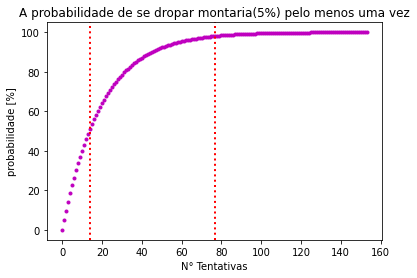

A partir de 14 tentativas, temos probabilidade de sucesso acima de 50%.

A partir de 77 tentativas, temos probabilidade próxima dos 100% de sucesso.


In [7]:
# Usando o N° max de tentativas visto na simulacao p limitar nosso grafico
cinc = tentativa_max(qts_tentativas(0.95,maxx),50) 
cem = tentativa_max(qts_tentativas(0.95,maxx),98)


plt.title('A probabilidade de se dropar montaria(5%) pelo menos uma vez')
plt.plot(range(maxx), qts_tentativas(0.95,maxx),'m.') # N° max visto na simulacao
plt.xlabel('N° Tentativas')
plt.ylabel('probabilidade [%]')
#plt.axhline(50, color='y', linestyle='dotted', linewidth=2) # probabilidade que julgo aceitavel
plt.axvline(cinc, color='r', linestyle='dotted', linewidth=2) # tentativas para a prob(aceitavel)
plt.axvline(cem, color='r', linestyle='dotted', linewidth=2) # tentativas para a prob(suesso) ser quase certa
plt.show()
print('A partir de '+str(cinc)+' tentativas, temos probabilidade de sucesso acima de 50%.\n')
print('A partir de '+str(cem)+' tentativas, temos probabilidade próxima dos 100% de sucesso.')

#### Simulacao 2: Montaria com 2% de droprate, amostragem de 10.000 jogadores

In [8]:
simulacao_2 = pd.Series(chance_sucesso(0.02,10000)) 
simulacao_2.describe()

count    10000.000000
mean        49.843700
std         48.876239
min          1.000000
25%         15.000000
50%         35.000000
75%         69.000000
max        447.000000
dtype: float64

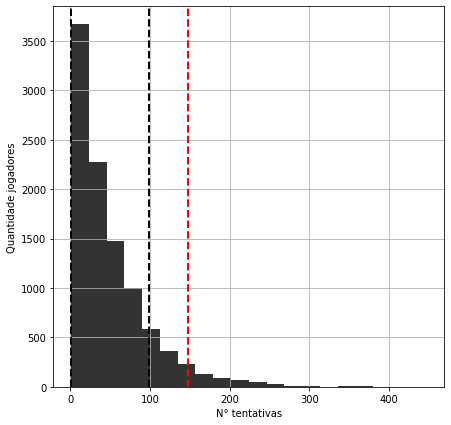

In [16]:
#A cada 10000 jogadores, quantos conseguirão o drop em quantas tentativas? 
simulacao_2.hist(color="k", alpha=0.8, bins=20, figsize=[7,7])
plt.axvline(simulacao_2.mean()-simulacao_2.std(), color='k', ls='--', lw=2) #Engloba 68% da população
plt.axvline(simulacao_2.mean()+simulacao_2.std(), color='k', ls='--', lw=2) #Engloba 68% da população
plt.axvline(simulacao_2.mean()+2*simulacao_2.std(), color='r', ls='--', lw=2) #Engloba 95% da população
plt.xlabel('N° tentativas')
plt.ylabel('Quantidade jogadores')
plt.show()

In [10]:
maxx = simulacao_2.max()

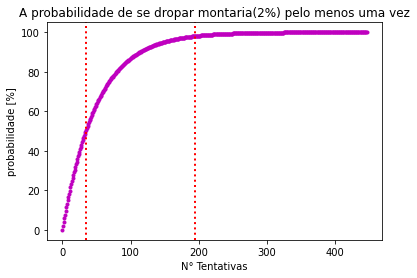

A partir de 35 tentativas, temos probabilidade de sucesso acima de 50%.

A partir de 194 tentativas, temos probabilidade próxima dos 100% de sucesso.


In [11]:
# Usando o N° max de tentativas visto na simulacao p limitar nosso grafico
cinc = tentativa_max(qts_tentativas(0.98,maxx),50) 
cem = tentativa_max(qts_tentativas(0.98,maxx),98)


plt.title('A probabilidade de se dropar montaria(2%) pelo menos uma vez')
plt.plot(range(maxx), qts_tentativas(0.98,maxx),'m.') # N° max visto na simulacao
plt.xlabel('N° Tentativas')
plt.ylabel('probabilidade [%]')
#plt.axhline(50, color='y', linestyle='dotted', linewidth=2) # probabilidade que julgo aceitavel
plt.axvline(cinc, color='r', linestyle='dotted', linewidth=2) # tentativas para a prob(aceitavel)
plt.axvline(cem, color='r', linestyle='dotted', linewidth=2) # tentativas para a prob(suesso) ser quase certa
plt.show()
print('A partir de '+str(cinc)+' tentativas, temos probabilidade de sucesso acima de 50%.\n')
print('A partir de '+str(cem)+' tentativas, temos probabilidade próxima dos 100% de sucesso.')

#### Simulacao 3: Montaria com 1% de droprate, amostragem de 10.000 jogadores

In [12]:
simulacao_3 = pd.Series(chance_sucesso(0.01,10000)) 
simulacao_3.describe()

count    10000.000000
mean        99.131300
std         99.894885
min          1.000000
25%         29.000000
50%         67.000000
75%        137.000000
max       1087.000000
dtype: float64

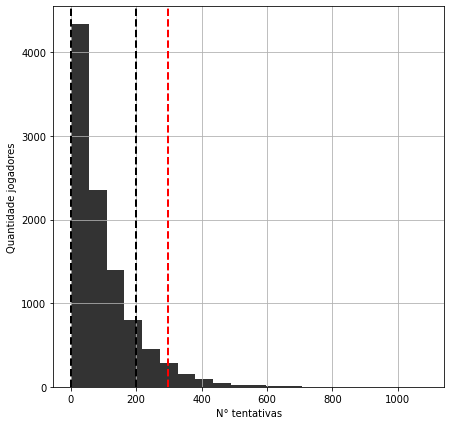

In [17]:
#A cada 10000 jogadores, quantos conseguirão o drop em quantas tentativas? 
simulacao_3.hist(color="k", alpha=0.8, bins=20, figsize=[7,7])
plt.axvline(simulacao_3.mean()-simulacao_3.std(), color='k', ls='--', lw=2) #Engloba 68% da população
plt.axvline(simulacao_3.mean()+simulacao_3.std(), color='k', ls='--', lw=2) #Engloba 68% da população
plt.axvline(simulacao_3.mean()+2*simulacao_3.std(), color='r', ls='--', lw=2) #Engloba 95% da população
plt.xlabel('N° tentativas')
plt.ylabel('Quantidade jogadores')
plt.show()

In [14]:
maxx = simulacao_3.max()

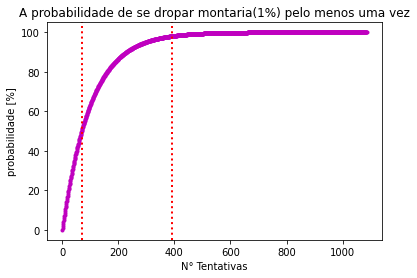

A partir de 69 tentativas, temos probabilidade de sucesso acima de 50%.

A partir de 390 tentativas, temos probabilidade próxima dos 100% de sucesso.


In [15]:
# Usando o N° max de tentativas visto na simulacao p limitar nosso grafico
cinc = tentativa_max(qts_tentativas(0.99,maxx),50) 
cem = tentativa_max(qts_tentativas(0.99,maxx),98)


plt.title('A probabilidade de se dropar montaria(1%) pelo menos uma vez')
plt.plot(range(maxx), qts_tentativas(0.99,maxx),'m.') # N° max visto na simulacao
plt.xlabel('N° Tentativas')
plt.ylabel('probabilidade [%]')
#plt.axhline(50, color='y', linestyle='dotted', linewidth=2) # probabilidade que julgo aceitavel
plt.axvline(cinc, color='r', linestyle='dotted', linewidth=2) # tentativas para a prob(aceitavel)
plt.axvline(cem, color='r', linestyle='dotted', linewidth=2) # tentativas para a prob(suesso) ser quase certa
plt.show()
print('A partir de '+str(cinc)+' tentativas, temos probabilidade de sucesso acima de 50%.\n')
print('A partir de '+str(cem)+' tentativas, temos probabilidade próxima dos 100% de sucesso.')

 - Lembrando: Cada evento é INDEPENDENTE. Ou seja, não significa que sua proxima tentativa terá 50% de chance, caso vc já tenha tentado 69 vezes. Sua proxima chance continuará sendo a % da mount (nesse caso, 1%). 
 - O que calculamos aqui é que a probabilidade de, em 69 tentativas, você ter dropado a montaria PELO MENOS 1 vez é de 50%. 